### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
#reading dataset
train = pd.read_csv(r"data/train_ctrUa4K.csv")
test = pd.read_csv(r"data/test_lAUu6dG.csv")

In [3]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
train.shape

(614, 13)

In [5]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [6]:
test.shape

(367, 12)

In [7]:
#making copies
train_copy = train.copy()
test_copy = test.copy()

In [8]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [10]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [11]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [13]:
#obataining the count of unique categories 
cat_features = ["Gender", "Married","Dependents","Education","Self_Employed","Credit_History","Property_Area","Loan_Status"]
for i in cat_features:
    print(" ")
    print(train[i].value_counts())

 
Male      489
Female    112
Name: Gender, dtype: int64
 
Yes    398
No     213
Name: Married, dtype: int64
 
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
 
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
 
No     500
Yes     82
Name: Self_Employed, dtype: int64
 
1.0    475
0.0     89
Name: Credit_History, dtype: int64
 
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
 
Y    422
N    192
Name: Loan_Status, dtype: int64


#### Univariate Analysis (analyzing each feature individually)

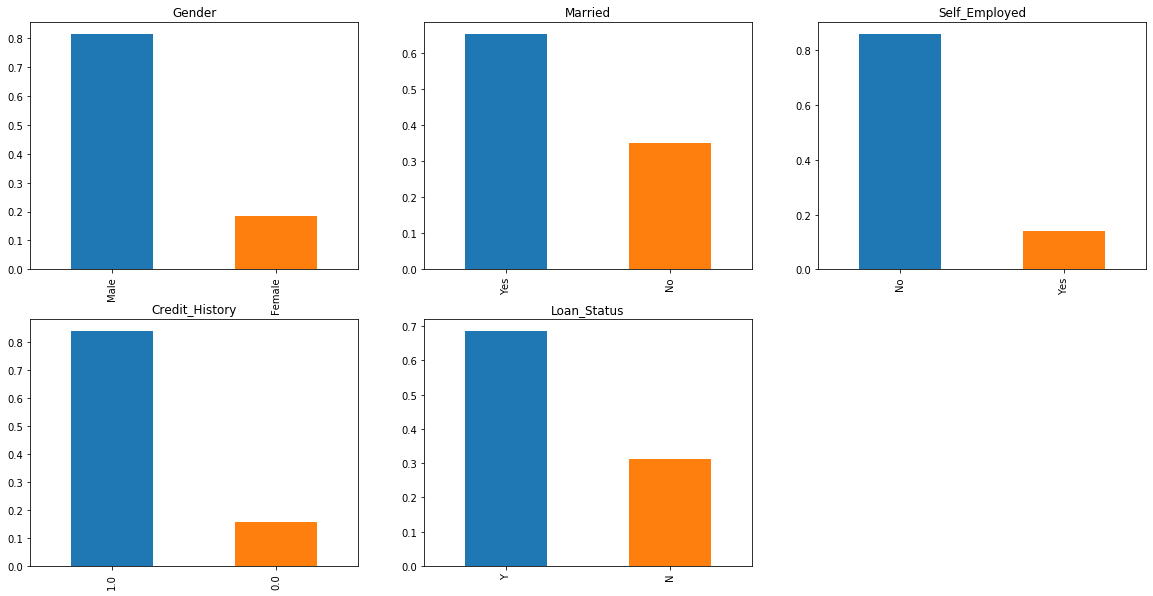

In [14]:
#visualizing categorical features (no order)
cat = ["Gender", "Married","Self_Employed","Credit_History","Loan_Status"]
plt.figure(1)
for i in range(len(cat)):
    plt.subplot(230+i+1)
    train[cat[i]].value_counts(normalize=True).plot.bar(figsize=(20,10), title=cat[i])
plt.show()

- 80% of the loan applicants are male, 60% of the applicants are married, 80% are self employed, 80% of loan applicants repay their debts and 70% of the applicants have being approved of loan

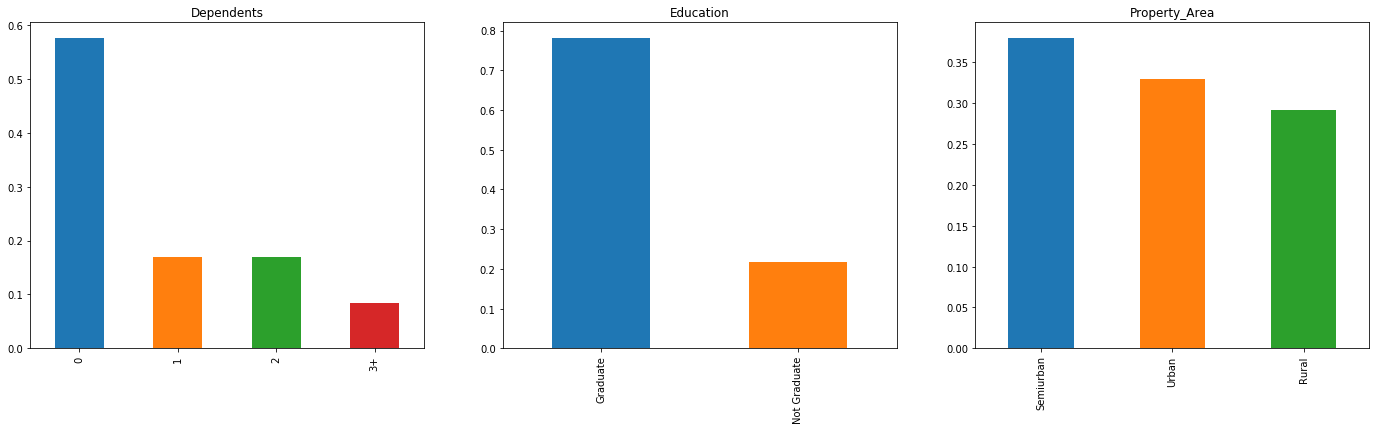

In [15]:
#visualizing categorical features (order)
cat = ["Dependents", "Education","Property_Area"]
plt.figure(1)
for i in range(len(cat)):
    plt.subplot(130+i+1)
    train[cat[i]].value_counts(normalize=True).plot.bar(figsize=(24,6), title=cat[i])
plt.show()

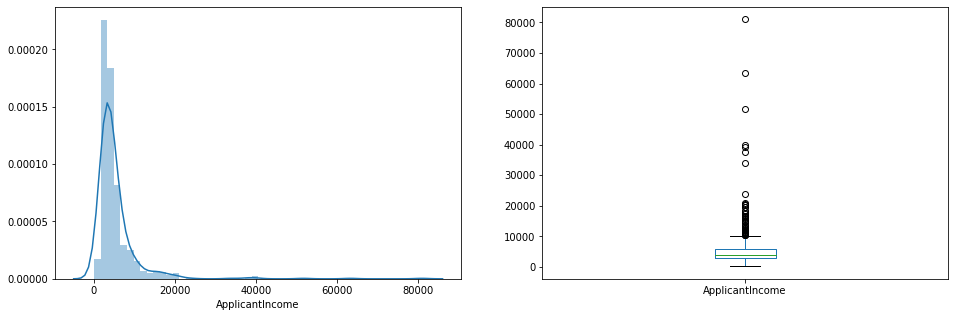

In [16]:
#distribution of application income
plt.figure(1) 
plt.subplot(121) 
sns.distplot(train["ApplicantIncome"])
plt.subplot(122) 
train["ApplicantIncome"].plot.box(figsize=(16,5))
plt.show()

#### The distribution is towards the left which means the data is not normally distributed. Normal distribution is preferred because algorithms walk better when data is normally distribution. The boxplot shows there's a lot of outliers, probabaly because of income disparity between people with different educational levels.

Text(0.5, 0.98, '')

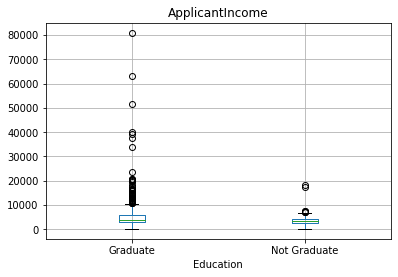

In [17]:
#segregating applicant income by education
train.boxplot(column="ApplicantIncome", by="Education")
plt.suptitle("")

#### Looking the the box plot above, we can see graduates earn a very high income which is showing to be the outliers

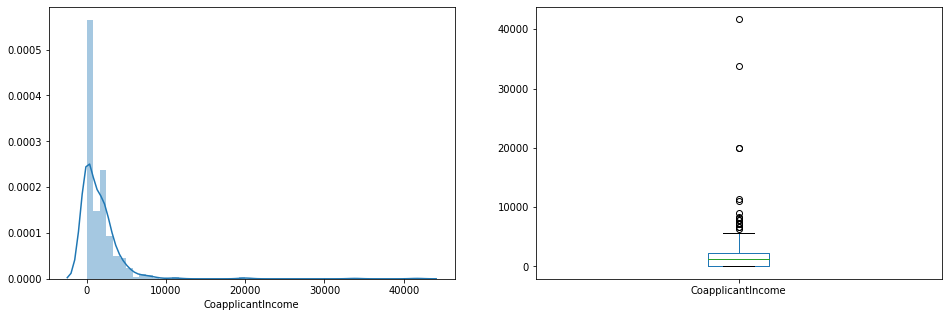

In [18]:
#checking out the coapplicant income
plt.figure(1) 
plt.subplot(121) 
sns.distplot(train["CoapplicantIncome"])
plt.subplot(122) 
train["CoapplicantIncome"].plot.box(figsize=(16,5))
plt.show()

##### The coapplicantIncome distribution is similar to that of the applicantIncome, most of their income is below 10000 and it also distributed to the left.

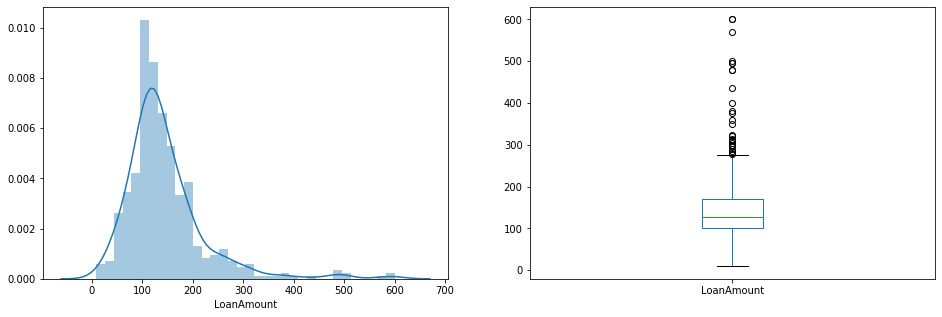

In [19]:
#checking the distribution of the loan amount variable
plt.figure(1) 
plt.subplot(121)
df = train.dropna()
sns.distplot(df["LoanAmount"])
plt.subplot(122) 
df["LoanAmount"].plot.box(figsize=(16,5))
plt.show()

##### The loan amount is fairly normally distributed and it also consists of some outliers

#### Bivariate Analysis ( comparing relationship btw features and target variable)

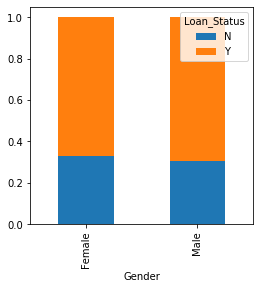

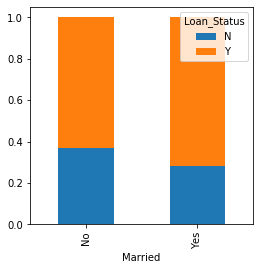

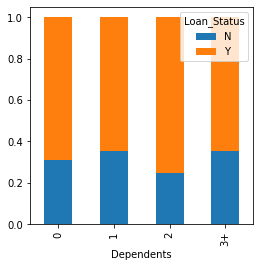

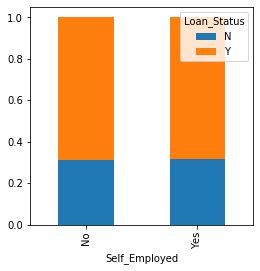

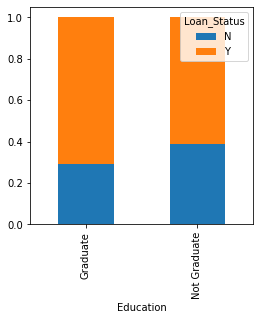

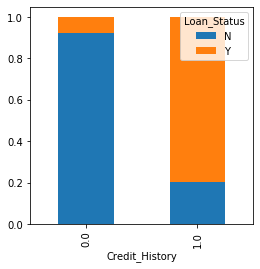

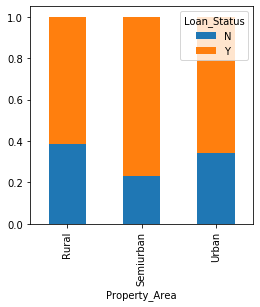

In [20]:
cate = ["Gender", "Married", "Dependents","Self_Employed","Education", "Credit_History", "Property_Area"]
for j in range(len(cate)):
    Gender = pd.crosstab(train[cate[j]], train["Loan_Status"])
    Gender.div(Gender.sum(1).astype("float"), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
    plt.show()

- Here, we can see that the ration of approved to unapproved loans is almost equal for the male and female.
- Married applicants have been approved more loans compared to the unmarried.
- Dependents category 0 and 3+ have similar loan approvals.
- Graduate applicants have been approved more loans compared to ones not graduated.
- Applicants with credit history of 1s have a higher chance of getting their loans approved.
- Applicants from semiurban areas have an higher chance of getting their loans approved.



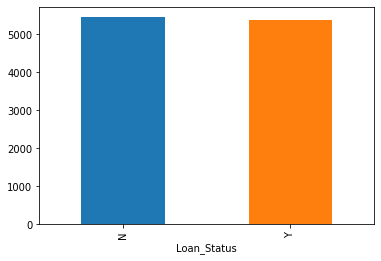

In [21]:
#mean income of applicants with and without approved loans
train.groupby("Loan_Status")["ApplicantIncome"].mean().plot.bar()

Text(0, 0.5, 'Percentage')

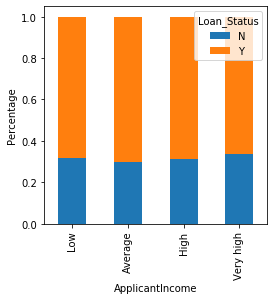

In [22]:
bins = [0, 2500, 4000,6000, 81000]
group = ["Low", "Average", "High", "Very high"]
train["Income_bin"] = pd.cut(train["ApplicantIncome"], bins, labels = group)
Income_bin = pd.crosstab(train["Income_bin"], train["Loan_Status"])
Income_bin.div(Income_bin.sum(1).astype("float"), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel("ApplicantIncome")
plt.ylabel("Percentage")

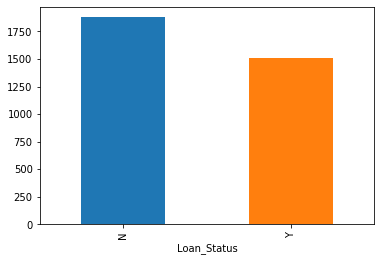

In [23]:
#mean income of Coapplicants with and without approved loans
train.groupby("Loan_Status")["CoapplicantIncome"].mean().plot.bar()

Text(0, 0.5, 'Percentage')

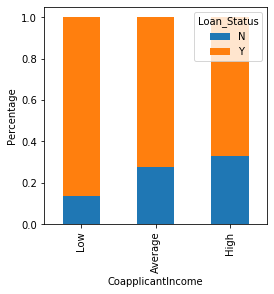

In [24]:
bins = [0, 1000, 3000,42000]
group = ["Low", "Average", "High"]
train["Co_Income_bin"] = pd.cut(train["CoapplicantIncome"], bins, labels = group)
Co_Income_bin = pd.crosstab(train["Co_Income_bin"], train["Loan_Status"])
Co_Income_bin.div(Co_Income_bin.sum(1).astype("float"), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel("CoapplicantIncome")
plt.ylabel("Percentage")

#### Unlike the applicants's income not being a strong determinant as to whether a loan is approved or not, from above we see that the coapplicant's income has a stronger determinant. The plot above shows that the lower the coapplicant's income the higher chance of getting an approvesd loan.

Text(0, 0.5, 'Percentage')

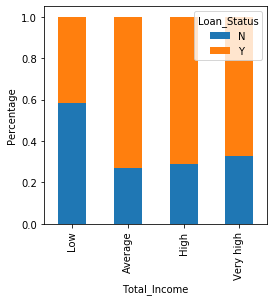

In [25]:
#combining applicants and Coapplicants income
train["Total_Income"] = train["ApplicantIncome"] + train["CoapplicantIncome"]
bins = [0, 2500, 4000,6000, 81000]
group = ["Low", "Average", "High", "Very high"]
train["Total_Income_bin"] = pd.cut(train["Total_Income"], bins, labels = group)
Total_Income_bin = pd.crosstab(train["Total_Income_bin"], train["Loan_Status"])
Total_Income_bin.div(Total_Income_bin.sum(1).astype("float"), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel("Total_Income")
plt.ylabel("Percentage")

- Adding the applicant and coapplicant's income, we see that a low total income gives a low chance of of having a loan approved 

Text(0, 0.5, 'Percentage')

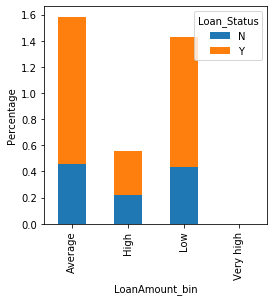

In [26]:
#visualizing loan amount
bins = [0,100, 200, 700]
group = ["Low", "Average", "High"]
train["LoanAmount_bin"] = pd.cut(train["LoanAmount"], bins, labels = group)
LoanAmount_bin = pd.crosstab(train["LoanAmount_bin"], train["Loan_Status"])
LoanAmount_bin.div(Income_bin.sum(1).astype("float"), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel("LoanAmount_bin")
plt.ylabel("Percentage")

In [27]:
#dropping bins used for EDA
train = train.drop(["Income_bin", "Co_Income_bin", "Total_Income", "Total_Income_bin", "LoanAmount_bin"], axis=1)

In [28]:
#replacing 3+ in dependents feature with 3, to make it more numerical
train["Dependents"].replace('3+',3, inplace=True)
test["Dependents"].replace('3+',3, inplace=True)

In [29]:
#converting target to numerical category
train["Loan_Status"].replace('N',0, inplace=True)
train["Loan_Status"].replace('Y',1, inplace=True)

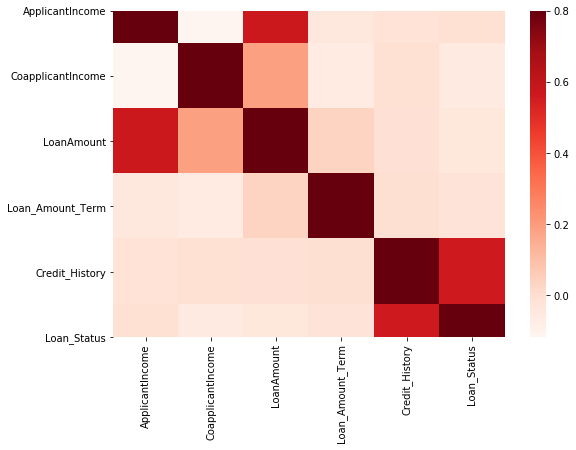

In [30]:
#using heatmaps to check for correlation
corr = train.corr() 
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(corr, vmax=.8, square=True, cmap="Reds")

##### We see that loan amount and credit history are the most correlated features to Loan status

### Filling in missing values in the data. 

In [31]:
#for the loan amount feature
train["Loan_Amount_Term"].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [32]:
#using the mode of the categories to fill the categorical features
cat_null= ["Gender", "Married","Dependents","Credit_History","Self_Employed", "Loan_Amount_Term"]
for cat in cat_null:
    train[cat].fillna(train[cat].mode()[0], inplace=True)

In [33]:
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [34]:
train["LoanAmount"].value_counts()

120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
128.0    11
113.0    11
130.0    10
96.0      9
95.0      9
70.0      8
115.0     8
112.0     8
150.0     7
135.0     7
136.0     7
132.0     7
125.0     7
104.0     7
80.0      6
81.0      6
138.0     6
90.0      6
158.0     6
116.0     6
175.0     6
144.0     6
155.0     6
180.0     6
152.0     5
         ..
315.0     1
101.0     1
73.0      1
142.0     1
48.0      1
164.0     1
83.0      1
191.0     1
166.0     1
495.0     1
59.0      1
214.0     1
240.0     1
72.0      1
42.0      1
349.0     1
280.0     1
405.0     1
279.0     1
304.0     1
650.0     1
436.0     1
78.0      1
54.0      1
89.0      1
570.0     1
300.0     1
376.0     1
117.0     1
311.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [37]:
#replacing null values with the median for the loan amount, the mean it is easily affected by the large presence of outliers
train["LoanAmount"].fillna(train["LoanAmount"].median(), inplace = True)

In [38]:
#checking if all missing are gone
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [39]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [40]:
#filling up the empty spaces in test data
cat_null_test= ["Gender","Dependents","Credit_History","Self_Employed", "Loan_Amount_Term"]
for cat in cat_null_test:
    test[cat].fillna(test[cat].mode()[0], inplace=True)

In [41]:
test["LoanAmount"].fillna(test["LoanAmount"].median(), inplace = True)

In [43]:
#using log transformation to prevent skewness of distribution
train["LoanAmount_log"] = np.log(train["LoanAmount"])
test["LoanAmount_log"] = np.log(test["LoanAmount"])

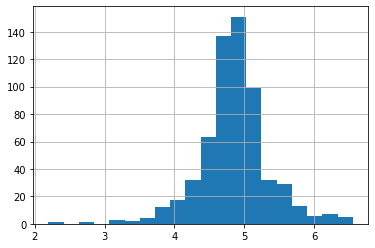

In [44]:
train["LoanAmount_log"].hist(bins=20)

### The distribution seems more like a normal distribution

In [45]:
#dropping the load_id column since it does not affect the loan status in any way
train = train.drop('Loan_ID', axis = 1)
test = test.drop('Loan_ID', axis = 1)

In [46]:
#obtaining the features and target from the data
X = train.drop('Loan_Status', axis=1)
y = train['Loan_Status']

In [47]:
X = pd.get_dummies(X)

In [48]:
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,4.852030,0,1,1,0,...,1,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,4.852030,0,1,0,1,...,0,1,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,4.189655,0,1,0,1,...,1,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,4.787492,0,1,0,1,...,1,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,4.948760,0,1,1,0,...,1,0,0,1,0,1,0,0,0,1


In [49]:
#spliting train data into train and validation
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3)

In [50]:
#using logisitc regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [51]:
#predicitng the on the val data
pred_val = model.predict(X_val)

In [52]:
#checking its accuracy score
acc_pred = accuracy_score(y_val, pred_val)
acc_pred

0.7351351351351352

In [54]:
test = pd.get_dummies(test)

In [55]:
#predictions on the test data
pred_test = model.predict(test)

In [57]:
#importing the submission file to check 
submission = pd.read_csv(r"data/sample_submission_49d68Cx.csv")

In [58]:
submission["Loan_Status"] = pred_test
submission["Loan_ID"] = test_copy["Loan_ID"]

In [59]:
submission["Loan_Status"].replace (0, "N", inplace=True)
submission["Loan_Status"].replace (1, "Y", inplace=True)

In [67]:
submission.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [68]:
res = res.drop("Unnamed: 0", axis=1)
res.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [69]:
pd.DataFrame(res, columns = ["Loan_ID", "Loan_Status"]).to_csv("logistic.csv")

In [70]:
res = pd.read_csv("logistic.csv")
res.head()

,Unnamed: 0,Loan_ID,Loan_Status
0,0,LP001015,Y
1,1,LP001022,Y
2,2,LP001031,Y
3,3,LP001035,Y
4,4,LP001051,Y


In [71]:
#using k fold validation
from sklearn.model_selection import StratifiedKFold

In [75]:
i = 1
kf = StratifiedKFold(n_splits=5, random_state = 1, shuffle=True)
for train_index, test_index in kf.split(X, y):
    print('\n {} of kfold {}'.format(i, kf.n_splits))
    xtr, xvl = X.iloc[train_index], X.iloc[test_index]
    ytr, yvl = y.iloc[train_index], y.iloc[test_index]
    model_cv = LogisticRegression(random_state = 1)
    model_cv.fit(xtr, ytr)
    pred_test_cv = model_cv.predict(xvl)
    score = accuracy_score(yvl, pred_test_cv)
    print("accuracy_score", score)
    i += 1
    pred_test = model_cv.predict(test)
    pred = model_cv.predict_proba(xvl)[:,1]


 1 of kfold 5
accuracy_score 0.7983870967741935

 2 of kfold 5
accuracy_score 0.8306451612903226

 3 of kfold 5
accuracy_score 0.8114754098360656

 4 of kfold 5
accuracy_score 0.7950819672131147

 5 of kfold 5
accuracy_score 0.8278688524590164


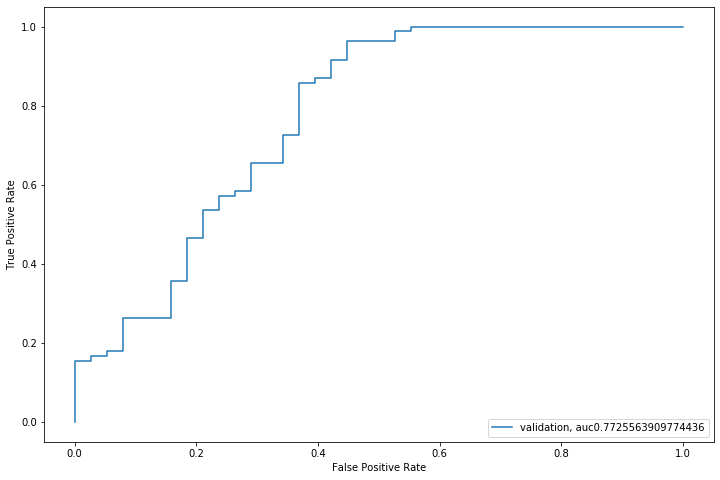

In [76]:
from sklearn import metrics 
fpr, tpr, _ = metrics.roc_curve(yvl, pred)
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, label="validation, auc"+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4) 
plt.show()

In [ ]:
submission["Loan_Status"] = pred_test_cv
submission["Loan_ID"] = test_copy["Loan_ID"]

In [ ]:
submission["Loan_Status"].replace (0, "N", inplace=True)
submission["Loan_Status"].replace (1, "Y", inplace=True)

In [ ]:
pd.DataFrame(submission, columns = ["Loan_ID", "Loan_Status"]).to_csv("logistic.csv")

### Addition of new features that can improve model
#### The features added are:
- Total income: this is the sum of the applicant and coapplicant income. From our analysis don above, it is seen that if the totla income is high, chance of loan approval might also be high

- EMI: this is the monthly allownace to be paid back by the applicant to repay the loan. Applicant's with hight EMI might find it difficult to pay back. EMI = Loan amount/Loan amount term

- Balance Income: this is the income left after EMI has been paid. The higher this value, the higher the chance of the applicant repaying the loan thereby increasing chance of loan approval 

In [77]:
train['Total_Income'] = train["ApplicantIncome"] + train["CoapplicantIncome"]
test['Total_Income'] = test["ApplicantIncome"] + test["CoapplicantIncome"]

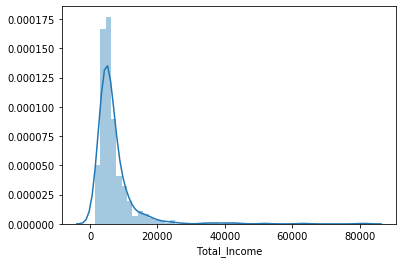

In [78]:
#distribution of total income
sns.distplot(train["Total_Income"])

From above, it is seen that the distribution right skewed (i.e shifted to the left). Log transformation will done to make the distribution normal

In [79]:
train['Total_Income_log'] =np.log(train["Total_Income"])
test['Total_Income_log'] =np.log(test["Total_Income"])

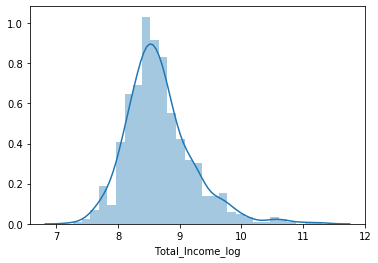

In [81]:
sns.distplot(train['Total_Income_log'] )

The distribution now looks normally distributed

In [82]:
#the EMI feature
train["EMI"] = train["LoanAmount"]/train["Loan_Amount_Term"]
test["EMI"] = test["LoanAmount"]/test["Loan_Amount_Term"]

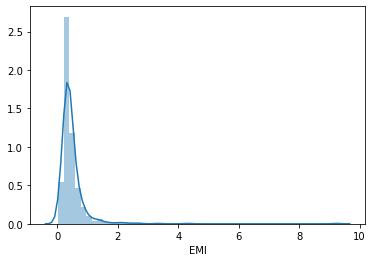

In [84]:
sns.distplot(train['EMI'] )

In [85]:
train["EMI"]

0      0.355556
1      0.355556
2      0.183333
3      0.333333
4      0.391667
5      0.741667
6      0.263889
7      0.438889
8      0.466667
9      0.969444
10     0.194444
11     0.302778
12     0.555556
13     0.316667
14     0.141667
15     0.347222
16     0.416667
17     0.211111
18     0.369444
19     0.319444
20     0.288889
21     0.875000
22     0.322222
23     0.311111
24     0.419444
25     0.530556
26     0.338889
27     0.305556
28     0.097222
29     0.333333
         ...   
584    0.405556
585    2.047619
586    0.288889
587    0.194444
588    0.261111
589    0.294444
590    0.311111
591    0.854167
592    0.811111
593    0.788889
594    0.722222
595    0.305556
596    0.519444
597    0.244444
598    0.500000
599    0.533333
600    1.944444
601    0.430556
602    0.355556
603    0.477778
604    1.377778
605    0.711111
606    0.480556
607    0.436111
608    0.300000
609    0.197222
610    0.222222
611    0.702778
612    0.519444
613    0.369444
Name: EMI, Length: 614, 

In [86]:
#balance income feature
train["Balance_Income"] = train["Total_Income"] - (train["EMI"]*1000) #multiplied with 1000 to make units equal
test["Balance_Income"] = test["Total_Income"] - (test["EMI"]*1000)

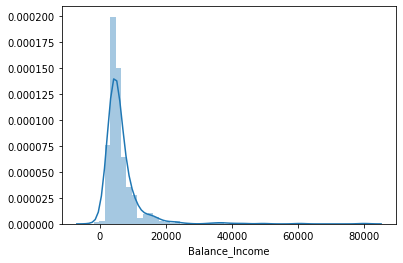

In [87]:
sns.distplot(train['Balance_Income'] )

Dropping features used to create new features since the correltion between them will be high. Removing correlated features helps reduce noise.

In [88]:
train = train.drop(["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"], axis =1)
test = test.drop(["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"], axis =1)

In [99]:
X= train.drop("Loan_Status", axis=1)

In [100]:
X = pd.get_dummies(X)

In [101]:
i = 1
kf = StratifiedKFold(n_splits=5, random_state = 1, shuffle=True)
for train_index, test_index in kf.split(X, y):
    print('\n {} of kfold {}'.format(i, kf.n_splits))
    xtr, xvl = X.iloc[train_index], X.iloc[test_index]
    ytr, yvl = y.iloc[train_index], y.iloc[test_index]
    model_cv = LogisticRegression(random_state = 1)
    model_cv.fit(xtr, ytr)
    pred_test_cv = model_cv.predict(xvl)
    score = accuracy_score(yvl, pred_test_cv)
    print("accuracy_score", score)
    i += 1
    pred_test = model_cv.predict(test)
    pred = model_cv.predict_proba(xvl)[:,1]


 1 of kfold 5
accuracy_score 0.8064516129032258

 2 of kfold 5
accuracy_score 0.8225806451612904

 3 of kfold 5
accuracy_score 0.7786885245901639

 4 of kfold 5
accuracy_score 0.7868852459016393

 5 of kfold 5
accuracy_score 0.8278688524590164


From the results gotten, we see that the addition of the new features did not improve the model. Trying out other models

#### Using Decision Tree

In [102]:
from sklearn import tree

In [103]:
i = 1
kf = StratifiedKFold(n_splits=5, random_state = 1, shuffle=True)
for train_index, test_index in kf.split(X, y):
    print('\n {} of kfold {}'.format(i, kf.n_splits))
    xtr, xvl = X.iloc[train_index], X.iloc[test_index]
    ytr, yvl = y.iloc[train_index], y.iloc[test_index]
    model_cv = tree.DecisionTreeClassifier(random_state = 1)
    model_cv.fit(xtr, ytr)
    pred_test_cv = model_cv.predict(xvl)
    score = accuracy_score(yvl, pred_test_cv)
    print("accuracy_score", score)
    i += 1
    pred_test = model_cv.predict(test)
    pred = model_cv.predict_proba(xvl)[:,1]


 1 of kfold 5
accuracy_score 0.7419354838709677

 2 of kfold 5
accuracy_score 0.7580645161290323

 3 of kfold 5
accuracy_score 0.680327868852459

 4 of kfold 5
accuracy_score 0.6475409836065574

 5 of kfold 5
accuracy_score 0.7213114754098361


This performs worse than the logisitc regression

### Random Forest

In [104]:
from sklearn.ensemble import RandomForestClassifier

In [105]:
i = 1
kf = StratifiedKFold(n_splits=5, random_state = 1, shuffle=True)
for train_index, test_index in kf.split(X, y):
    print('\n {} of kfold {}'.format(i, kf.n_splits))
    xtr, xvl = X.iloc[train_index], X.iloc[test_index]
    ytr, yvl = y.iloc[train_index], y.iloc[test_index]
    model_cv = RandomForestClassifier(random_state = 1, max_depth=10)
    model_cv.fit(xtr, ytr)
    pred_test_cv = model_cv.predict(xvl)
    score = accuracy_score(yvl, pred_test_cv)
    print("accuracy_score", score)
    i += 1
    pred_test = model_cv.predict(test)
    pred = model_cv.predict_proba(xvl)[:,1]


 1 of kfold 5
accuracy_score 0.7903225806451613

 2 of kfold 5
accuracy_score 0.7338709677419355

 3 of kfold 5
accuracy_score 0.7459016393442623

 4 of kfold 5
accuracy_score 0.7786885245901639

 5 of kfold 5
accuracy_score 0.7786885245901639


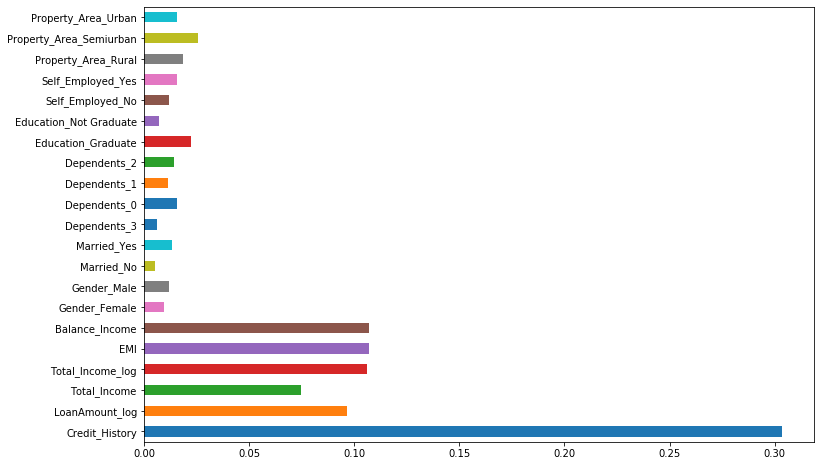

In [107]:
#obtaining the important features
important_feat = pd.Series(model_cv.feature_importances_, index=X.columns)
important_feat.plot(kind='barh', figsize=(12,8))

From the graph plotted above, we can see that the additional features helped in predicting the target variables

Courtesy: AnalyticsVidhya loan prediction course